<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
# Write your code here
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

data_set = pd.read_csv('movie_reviews_sentiment.csv')
text = data_set['clean_test']
count_vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = count_vectorizer.fit_transform(text)

n_topics = 10
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(X)

features = count_vectorizer.get_feature_names_out()
print(features)
print("Top 10 clusters are")
for id, topic in enumerate(lda_model.components_):
    top_clusters = [features[i] for i in topic.argsort()[-10:]]
    print(f"{id + 1}: {', '.join(top_clusters)}")

topics = lda_model.transform(X)
data_set['Topic'] = topics.argmax(axis=1)

print("\nDescription of topics")
topic_data = []
for id in range(n_topics):
    topic = [features[i] for i in lda_model.components_[id].argsort()[-10:]]
    summary = f" {id + 1}: " + ", ".join(topic)
    topic_data.append(summary)
    print(summary)



['10' '1000' '2009' ... 'ya' 'years' 'yeppy']
Top 10 clusters are
1: characters, films, lot, fans, mcu, wolverine, movie, deadpool, film, cameos
2: wolverine, went, funny, lot, moments, definitely, didn, jokes, fun, movie
3: watch, time, films, like, good, plot, story, deadpool, film, just
4: great, ask, want, makes, deadpool, really, sure, mcu, fun, movie
5: don, review, guy, movie, fun, great, story, deadpool, just, film
6: deadpool, team, 10, characters, new, superhero, really, best, marvel, movie
7: wasn, lot, story, actually, film, opening, really, movie, wolverine, deadpool
8: great, make, story, eggs, expect, easter, did, bit, scenes, jokes
9: really, watching, marvel, movie, got, fight, know, film, just, like
10: comedy, makes, depth, funny, cinematic, probably, mcu, characters, deadpool, film

Description of topics
 1: characters, films, lot, fans, mcu, wolverine, movie, deadpool, film, cameos
 2: wolverine, went, funny, lot, moments, definitely, didn, jokes, fun, movie
 3: wa

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
# Write your code here
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
warnings.filterwarnings("ignore")

data_set = data_set[['clean_test', 'sentiment']].dropna()

X = data_set['clean_test']
y = data_set['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_X_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_X_test = tfidf_vectorizer.transform(X_test)


classifier_1 = LogisticRegression(random_state=42)
classifier_2 = SVC(random_state=42)

classifier_1_cross = cross_validate(classifier_1, tfidf_X_train, y_train, cv=5, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])
classifier_2_cross = cross_validate(classifier_2, tfidf_X_train, y_train, cv=5, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])

classifier_1.fit(tfidf_X_train, y_train)
classifier_2.fit(tfidf_X_train, y_train)

y_pred_classifier_1 = classifier_1.predict(tfidf_X_test)
y_pred_classifier_2 = classifier_2.predict(tfidf_X_test)

results_classifier_1 = {
    "accuracy": accuracy_score(y_test, y_pred_classifier_1),
    "precision": precision_score(y_test, y_pred_classifier_1, average='weighted'),
    "recall": recall_score(y_test, y_pred_classifier_1, average='weighted'),
    "f1_score": f1_score(y_test, y_pred_classifier_1, average='weighted'),
}

results_classifier_2= {
    "accuracy": accuracy_score(y_test, y_pred_classifier_2),
    "precision": precision_score(y_test, y_pred_classifier_2, average='weighted'),
    "recall": recall_score(y_test, y_pred_classifier_2, average='weighted'),
    "f1_score": f1_score(y_test, y_pred_classifier_2, average='weighted'),
}

print("Results of Logistic Regression")
print(results_classifier_1)
print("\nResults of Random Forest")
print(results_classifier_2)
print("\nClassification Report of Logistic Regression")
print(classification_report(y_test,y_pred_classifier_1))
print("\nClassification Report of Random Forest")
print(classification_report(y_test, y_pred_classifier_2))

Results of Logistic Regression
{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}

Results of Random Forest
{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}

Classification Report of Logistic Regression
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        43
     Neutral       1.00      1.00      1.00        29
    Positive       1.00      1.00      1.00       136

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208


Classification Report of Random Forest
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        43
     Neutral       1.00      1.00      1.00        29
    Positive       1.00      1.00      1.00       136

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg  

The accuracy, precision, recall and the F1 score have been employed to evaluate the Logistic Regression and Random Forest classifiers. Both models achieved perfect accuracy, precision, recall and F1 scores implying that they did quite well on the sentiment analysis task posed towards them. But in practice, these results can be taken as overfitting because the classification reports for the two models indicate that all categories of sentiment (positive, negative, neutral) were completely identified which is an unlikely occurrence. This may be as a result of the kind of dataset, or it may mean the task is not fully complicated. On the other hand while Logistic Regression is good in time and resources, Random Forest is better on intricate, nonlinear patterns and this is the main motive of why this method is oftentimes used in more diverse data sets. The models though well executed could have benefited quite well from some form of tuning or creative feature engineering.



# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

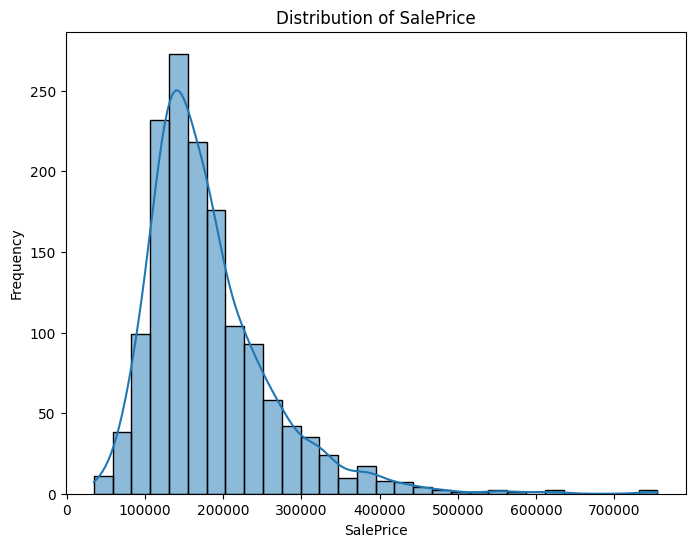

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


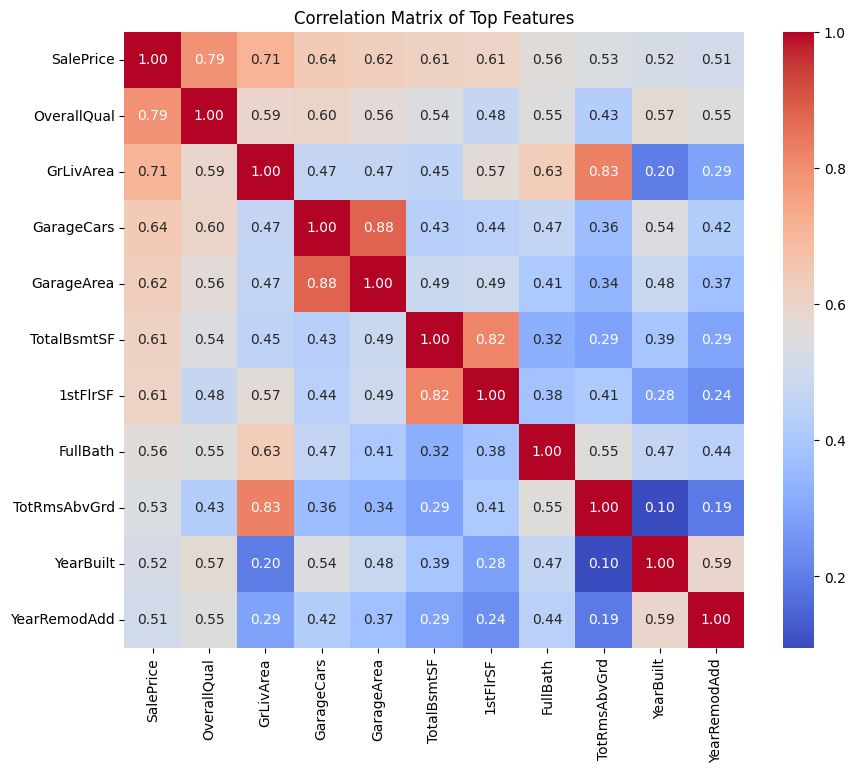

Mean Squared Error value is 1558239575.1510954
Mean Absolute Error value is 24774.219519604805
R-Squared value is0.7968483304281089


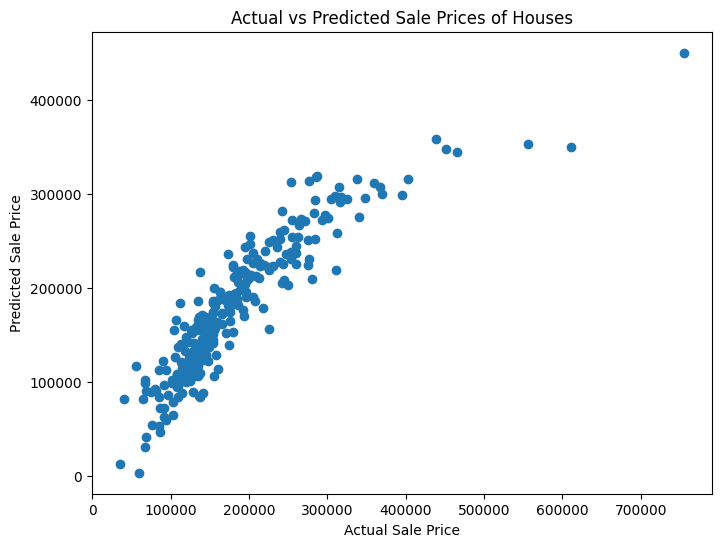

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

plt.figure(figsize=(8, 6))
sns.histplot(train_data['SalePrice'], kde=True, bins=30)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

missing_values = train_data.isnull().sum()
print(missing_values)

for col in train_data.columns:
    if train_data[col].dtype == "object":
        train_data[col].fillna("None", inplace=True)
    else:
        train_data[col].fillna(train_data[col].median(), inplace=True)

new_train_data = pd.get_dummies(train_data, drop_first=True)

correlation_matrix = new_train_data.corr()
saleprice_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)
top_features = saleprice_correlation.head(11).index
plt.figure(figsize=(10, 8))
sns.heatmap(new_train_data[top_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Top Features")
plt.show()

X = new_train_data[top_features.drop('SalePrice')]
y = new_train_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error value is {mse}")
print(f"Mean Absolute Error value is {mae}")
print(f"R-Squared value is{r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices of Houses")
plt.show()



# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
from transformers import pipeline, AutoTokenizer
import warnings
warnings.filterwarnings("ignore")

movie_reviews = data_set['clean_test'].tolist()
sentiment_of_review = [label.lower() for label in data_set['sentiment'].tolist()]
sentiment_analyzer = pipeline('sentiment-analysis', model='cardiffnlp/twitter-roberta-base-sentiment', device=0)
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
truncated_reviews = [tokenizer.decode(tokenizer.encode(review,truncation=True,max_length=512,add_special_tokens=True))for review in movie_reviews]
analysis_results = sentiment_analyzer(truncated_reviews,batch_size=16)

label_mapping = {'LABEL_0' : 'negative','LABEL_1' : 'neutral','LABEL_2' : 'positive'}

labels_from_analysis = [label_mapping[result['label']] for result in analysis_results]

accuracy = accuracy_score(sentiment_of_review, labels_from_analysis)
precision = precision_score(sentiment_of_review, labels_from_analysis,  average='weighted')
recall = recall_score(sentiment_of_review, labels_from_analysis, average='weighted')
f1 = f1_score(sentiment_of_review, labels_from_analysis, average='weighted')

print(f"Accuracy is {accuracy}")
print(f"Precision is {precision}")
print(f"Recall is {recall}")
print(f"F1 Score is {f1}")

Accuracy is 0.7692307692307693
Precision is 0.7903846153846154
Recall is 0.7692307692307693
F1 Score is 0.7777222777222778


The CardiffNLP Twitter RoBERTa Base Sentiment model has some benefits, including cutting-edge accuracy for persons who wish to carry out sentiment analysis, especially in regards to social media text and its seamless connection through the Hugging Face pipeline API. Still, it also has its flaws, such as possible difficulty in transferring learning to other domains than Twitter, as well as being computationally intensive, which makes it demanding in terms of space and processing power, particularly on larger datasets or systems running off GPUs. Further more the maximum token length limit of the model equal to 512 tokens means that such reviews will have to be truncated and thus bring about loss of relevant contextual information as well possible target phrases. Another non trivial issue in this case was the class imbalance and the truncation of reviews which were cut off and reduced the amount of context to be captured by sentiment. In spite of these, the model performed well attaining an accuracy of 0.77 and clear precision, recall and F1 scores.